# Simple interpolation using cubic splines in Python

## Intuition

A quadratic polynomial $p(x)=ax^{2}+bx+c$ has only three degrees of freedom ($a,b,c$). If you want your quadratic function to run through two points, you already have only one degree of freedom left. If the the slope of the curve at one of the end-points is fixed, this uses up the last degree of freedom, leaving no choice of slope at the other end. A cubic polynomical $ax^{3}+bx^{2}+cx+d$ has four degrees of freedom, thus allowing to prescribe four conditions - passing through two points and having specific slopes at the two end points.

Quadratic functions are more ringed. It's because, a quadratic has a fixed degree of bentness. If we glue together a few quadratics, to interpolate a set of points, a passenger roller-coaster travelling on this curve would experience long ascents and descents. Cubics are more relaxed. Unlike cubics, quadratics can't have a point of inflexion. Intuitively, this is why, cubic polynomials are used for interpolating a set of points. 

However, quadratic splines also have many applications, for example, they are used while designing true type fonts.

Cubic splines are also use to construct Bezier curves used in car designing.

## The math

Let $(x_{0},y_{0}),(x_{1},y_{1}),\ldots,(x_{n},y_{n})$ be $n+1$ points in $\mathbb{R}^2$. A spline is a piece-wise polynomial function of the form - 

$$S(x)=\begin{cases}
        S_{0}(x),& \text{if } x_{0}\le{x}\lt x_{1}\\
        \vdots\\
        S_{i}(x),& \text{if } x_{i}\le{x}\lt x_{i+1}\\
        \vdots\\
        S_{n-1}(x),& \text{if } x_{n-1}\le{x}\lt x_{n}\\
\end{cases}$$

$S_{i}(x)$ is a cubic polynomial with $4$ four coefficients, $\forall{i}$. There are $n$ intervals and a total of $4n$ unknowns. So, we need $4n$ conditions.

Suppose $S_{i}(x)$ has the form $S_{i}(x)=A_{i}(x-x_{i})^3+B_{i}(x-x_{i})^2+C_{i}(x-x_{i})+D_{i}$. The first and second derivatives of the cubic polynomials are:

$\begin{aligned}
S_{i}(x)&=A_{i}(x-x_{i})^3+B_{i}(x-x_{i})^2+C_{i}(x-x_{i})+D_{i}\\
S_{i}'(x)&=3A_{i}(x-x_{i})^2+2B_{i}(x-x_{i})+C_{i}\\
S_{i}''(x)&=6A_{i}(x-x_{i})+2B_{i}\\
\end{aligned}$

Also,

$\begin{aligned}
S_{i}(x_{i})&=D_{i}\\
S_{n-1}(x_{n})&=y_{n}\\
S_{i}'(x_{i})&=C_{i}\\
S_{i}''(x_{i})&=2B_{i}\\
\end{aligned}$

We define $h_{i}=x_{i}-x_{i-1}$. We have:

$\begin{aligned}
S_{i-1}(x_{i})&=A_{i-1}h_{i}^3+B_{i-1}h_{i}^2+C_{i-1}h_{i}+D_{i-1}\\
S_{i-1}'(x_{i})&=3A_{i-1}h_{i}^2+2B_{i-1}h_{i}+C_{i-1}\\
S_{i-1}''(x_{i})&=6A_{i-1}h_{i}+2B_{i-1}\\
\end{aligned}$


## Four properties of cubic splines

The spline should satisfy meet the below criteria - 

1. The function $S(x)$ will interpolate all data points. $S(x)$ must be continuous. And so in each interval, $S_{i}(x_{i})=y_{i}$ and $S_{i-1}(x_{i})=y_{i}$.

2. The curve $S(x)$ should be smooth without jumps. $S'(x)$ must be continuous on the interval $[x_{i},x_{i+1}]$. Therefore, the slopes at each interior points must match. $S_{i}'(x_{i})=S_{i-1}'(x_{i})$.

3. The curve $S(x)$ should be not have any abrupt changes in its bentness or convexity. $S''(x)$ will be continuous on the interval $[x_{i},x_{i+1}]$. $S_{i}''(x_{i})=S_{i-1}''(x_{i})$.

4. A choice of one of the following two conditions at the end points $(x_{0},y_{0})$ and $(x_{n},y_{n})$ 

(a) The natural spline: $S'_{0}(x_{0})=0=S'_{n-1}(x_{n})$

(b) The clamped cubic spline : $S'_{0}(x_{0})=f'(x_{0})$ and $S'_{n-1}(x_{n})=f'(x_{n})$ where $f$ is presumably the function, we are trying to approximate.

Let's determine the $4n$ conditions.

## Evaluation of the coefficients $A_i,B_{i},C_{i},D_{i}$

1) The first condition yields

$A_{i-1}h_{i}^3+B_{i-1}h_{i}^2+C_{i-1}h_{i}+D_{i-1}=D_{i}$

2) The second condition yields

$3A_{i-1}h_{i}^2+2B_{i-1}h_{i}+C_{i-1}=C_{i}$

3) The third condition yields

$6A_{i-1}h_{i}+2B_{i-1}=2B_{i}$

The above equations can be somwhat simplified, if we substitute $S_{i}''(x_{i})=2B_{i}=z_{i}$. Thus, we have $B_{i}=z_{i}/2$.

1) The last equation becomes :

$6A_{i-1}h_{i}=2(z_{i}/2)-2(z_{i-1}/2)=z_{i}-z_{i-1}$. 

$A_{i-1}=\frac{z_{i}-z_{i-1}}{6h_{i}}$, 

for $i=1,2,3,\ldots,n-2$

2) The first equation becomes :

$\begin{aligned}
C_{i-1}h_{i}&=y_{i}-y_{i-1}-A_{i-1}h_{i}^3-B_{i-1}h_{i}^2\\
C_{i-1}&=\frac{y_{i}-y_{i-1}}{h_{i}}-(A_{i-1}h_{i}^2+B_{i-1}h_{i})\\
C_{i-1}&=\frac{y_{i}-y_{i-1}}{h_{i}}-\left(\frac{z_{i}-z_{i-1}}{6h_{i}}h_{i}^2+\frac{z_{i-1}}{2}h_{i}\right)\\
C_{i-1}&=\frac{y_{i}-y_{i-1}}{h_{i}}-h_{i}\left(\frac{z_{i}+2z_{i-1}}{6}\right)\\
\end{aligned}$

We define $b_{i}=\frac{y_{i}-y_{i-1}}{h_{i}}$. We re-write:

$C_{i-1}=b_{i}-h_{i}\left(\frac{z_{i}+2z_{i-1}}{6}\right)$

for $i=1,2,3,\ldots,n-2$.

In all of the above the equations, the running index $i$ goes from $1$ to $n-1$. Thus, we now have our equations for determining the coefficients.

$A_{i-1}=\frac{z_{i}-z_{i-1}}{6h_{i}}$ for $i=1,2,3,\ldots,n-2$

$B_{i-1}=\frac{z_{i-1}}{2}$  for $i=1,2,3,\ldots,n-2$

$C_{i-1}=b_{i}-h_{i}\left(\frac{z_{i}+2z_{i-1}}{6}\right)$ for $i=1,2,3,\ldots,n-2$

$D_{i}=y_{i}$ for $i=1,2,3,\ldots,n-2$

Additionally, for the last polynomial piece of the curve $S_{n-1}(x_{n})=y_{n}$. 

## The system of equations in $z_{0},z_{1},z_{2},\ldots,z_{n-2}$

If we substitute these values in the second equation $3A_{i-1}h_{i}^2+2B_{i-1}h_{i}+C_{i-1}=C_{i}$, we should get a recurrence relation between $z_{i}$ -



$\begin{aligned}
3\frac{z_{i}-z_{i-1}}{6h_{i}}h_{i}^{2}+2\frac{z_{i-1}}{2}h_{i}+b_{i}-h_{i}\left(\frac{z_{i}+2z_{i-1}}{6}\right)&=b_{i+1}-h_{i+1}\left(\frac{z_{i+1}+2z_{i}}{6}\right)\\
\left(\frac{2z_{i}+z_{i-1}}{6}\right)h_{i}+\left(\frac{z_{i+1}+2z_{i}}{6}\right)h_{i+1}&=b_{i+1}-b_{i}\\
h_{i+1}z_{i+1}+2z_{i}(h_{i}+h_{i+1})+z_{i-1}h_{i}&=6(b_{i+1}-b_{i})
\end{aligned}$

for $i=1,2,3,\ldots,n-1$

This system of linear equations in $z_{0},z_{1},z_{2},\ldots,z_{n-1}$ can be represented in the matrix form as -



$\begin{bmatrix}
h_{1} & 2(h_{1}+h_{2}) & h_{2} & 0 & \ldots & 0 & 0 \\
0 & h_{2} & 2(h_{2}+h_{3}) & h_{3} & \ldots & 0 & 0 \\
0 & 0 & h_{3} & 2(h_{3}+h_{4}) & \ldots & \\
\vdots & & & & \ddots & \\
0 & 0 & 0 &\ldots & h_{n-1} & 2(h_{n-1}+h_{n}) & h_{n}
\end{bmatrix}
\begin{bmatrix}
z_{0}\\
z_{1}\\
z_{2}\\
\vdots\\
z_{n-1}
\end{bmatrix}
=\begin{bmatrix}
6(b_{2}-b_{1})\\
6(b_{3}-b_{2})\\
6(b_{4}-b_{3})\\
\vdots\\
6(b_{n}-b_{n-1})
\end{bmatrix}$

This matrix has $n-1$ rows and $n+1$ columns. So, we need two additional conditions.

For natural splines, $z_{0}=0=z_{n}$. The first column and the last column in the above system of linear equations can be eliminated, resulting in,

$\begin{bmatrix}
2(h_{1}+h_{2}) & h_{2} & 0 & \ldots & 0 & 0 \\
h_{2} & 2(h_{2}+h_{3}) & h_{3} & \ldots & 0 & 0 \\
0 & h_{3} & 2(h_{3}+h_{4}) & \ldots & \\
\vdots & & & \ddots & \\
0 & 0 & 0 &\ldots & h_{n-1} & 2(h_{n-1}+h_{n})
\end{bmatrix}
\begin{bmatrix}
z_{1}\\
z_{2}\\
\vdots\\
z_{n-2}
\end{bmatrix}
=\begin{bmatrix}
6(b_{2}-b_{1})\\
6(b_{3}-b_{2})\\
6(b_{4}-b_{3})\\
\vdots\\
6(b_{n-1}-b_{n-2})
\end{bmatrix}$

# Python Code Snippet 

In [76]:
# Simple Interpolation using cubic splines

import numpy as np
import matplotlib.pyplot as pl

x = np.array([-4,-2,0,2,4,7])
y = np.array([-128,-16,0,-40,16,51])
n = len(x)

print("\nx =",x)
print("\ny = ",y)

h = np.array(x[1:n]-x[0:n-1])
print("\nh =",h)

b = np.divide(y[1:n]-y[0:n-1],h)
print("\nb = ",b)

m = len(h)

# To determine z0,z1,...,zn, we need to solve a system of equations
# For natural splines, z0 = zn = 0. 
# So, we can eliminate the first and last columns. 
# The result is a (n-1)x(n-1) square matrix

s = (n-2,n-1)
p = n-2
q = n-1
A = np.zeros(s)

if s == (1,2):
    A[0][0]=2*(h[0]+h[1])
    A[0][1]=6*(b[1]-b[0])
    
if s == (2,3):
    A[0][0]=2*(h[0]+h[1])
    A[0][1]=h[1]
    A[1][0]=h[1]
    A[1][1]=2*(h[1]+h[2])
    
    A[0][2]=6*(b[1]-b[0])
    A[1][2]=6*(b[2]-b[1])

if (n-2) > 2:
    A[0][0]=2*(h[0]+h[1])
    A[0][1]=h[1]
    A[p-1][q-3]=h[m-2]
    A[p-1][q-2]=2*(h[m-2]+h[m-1])
    
    A[0][q-1]=6*(b[1]-b[0])
#    A[p-1][q-1]=6*(b[m-1]-b[m-2])
    A[p-1][q-1]=6*(b[m-2]-b[m-3])
    
    for i in range(1,p-1):
        A[i][i-1]= h[i]
        A[i][i]= 2*(h[i]+h[i+1])
        A[i][i+1]=h[i+1]
        
        A[i][q-1] = 6*(b[i+1]-b[i])
        
print("\nThe linear system of equations to be solved is : \n")    
print(A)


x = [-4 -2  0  2  4  7]

y =  [-128  -16    0  -40   16   51]

h = [2 2 2 2 3]

b =  [ 56.           8.         -20.          28.          11.66666667]

The linear system of equations to be solved is : 

[[   8.    2.    0.    0. -288.]
 [   2.    8.    2.    0. -168.]
 [   0.    2.    8.    2.  288.]
 [   0.    0.    2.   10.  288.]]


In [77]:
# Gaussian Elimination with pivoting

import numpy as np

# The augmented matrix is A
(r,t) = np.shape(A)

if(r,t) == (1,2):
    z = A[0][1]/A[0][0]

if r > 1:
    for i in range(0,r):
        pivot = A[i][i]
    
        for j in range(i+1,r):
            # Find the multiplier
            l = (A[j][i]/pivot)
        
            for k in range(i,t):
                A[j][k] = A[j][k]-(l*A[i][k])

    # The resulting upper triangular matrix
    print("\nThe resulting upper triangular matrix is : \n")    
    print(A)

    z = A[:,t-1]

    for i in range(r-1,-1,-1):
        for j in range(r-1,i,-1):
            z[i] = z[i]-(A[i][j]*z[j])

        z[i]=z[i]/A[i][i]
        A[i][t-1] = z[i]

z = np.append(np.array([0]),z)
z = np.append(z,0)

# After gaussian elimination, the values of z1,...,zn-1 are    
print("\nAfter gaussian elimination, the values of z1,...,zn-1 are")
print("\n",z)




The resulting upper triangular matrix is : 

[[   8.            2.            0.            0.         -288.        ]
 [   0.            7.5           2.            0.          -96.        ]
 [   0.            0.            7.46666667    2.          313.6       ]
 [   0.            0.            0.            9.46428571  204.        ]]

After gaussian elimination, the values of z1,...,zn-1 are

 [  0.         -30.38490566 -22.46037736  36.22641509  21.55471698   0.        ]


In [78]:
# Compute the coefficients a[i], b[i], c[i] and c[i]
n = len(x)-1

e = np.zeros(n)
f = np.zeros(n)
g = np.zeros(n)
o = np.zeros(n)

for i in range(0,n-1):
    e[i]=(z[i+1]-z[i])/(6*h[i])
    f[i]=(z[i]/2)
    g[i]=b[i]-h[i]*((z[i+1]+2*z[i])/6)
    o[i]=y[i]

o[n-1]=y[n-1]
g[n-1]=3*e[n-2]*(h[n-2]**2)+2*f[n-2]*(h[n-2])+g[n-2]
f[n-1]=z[n-1]/2
e[n-1]=((y[n]-y[n-1])-(f[n-1]*(h[n-1]**2)+g[n-1]*h[n-1]))/(h[n-1]**3)

print("Coefficients e[i] :",e)
print("Coefficients f[i] :",f)
print("Coefficients g[i] :",g)
print("Coefficients o[i] :",o)

Coefficients e[i] : [-2.53207547  0.66037736  4.89056604 -1.22264151 -8.34563242]
Coefficients f[i] : [  0.         -15.19245283 -11.23018868  18.11320755  10.77735849]
Coefficients g[i] : [ 66.12830189  35.74339623 -17.10188679  -3.33584906  54.44528302]
Coefficients o[i] : [-128.  -16.    0.  -40.   16.]


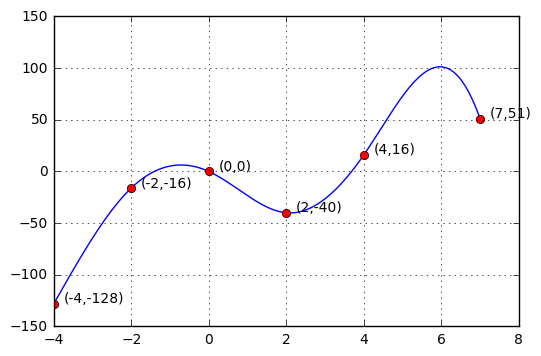

In [79]:
import matplotlib.pyplot as plt

# Construct the spline polynomials
n = len(x)-1

t = []
u = []
axis = []

for i in range(0,n):
    t = np.linspace(x[i],x[i+1],num=100)
    axis = np.append(axis,t)
    u = np.append(u,e[i]*((t-x[i])**3)+f[i]*((t-x[i])**2)+g[i]*(t-x[i])+o[i])

plt.plot(axis, u, 'b-',x,y,'ro')
for i in range(0,n+1):
    s = "("+str(x[i])+","+str(y[i])+")"
    plt.annotate(s,xy=(x[i],y[i]),xytext=(x[i]+0.25,y[i]+1),)
plt.grid(True)
plt.show()
